## **Task 1 :  Prediction using Supervised ML**

**Title :** Predict the percentage of an student based on the no. of study hours.

**Author :** Mushfiqur Rahman

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import seaborn as sns 

In [2]:
url = "http://bit.ly/w-data" #importing data
df = pd.read_csv(url) #read data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
print(df.dtypes) #Checking the type of data available

Hours     float64
Scores      int64
dtype: object


In [5]:
import seaborn as sns
import scipy as stats

In [6]:
df.corr() #Co-relation between data

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
import matplotlib as mpl
mpl.style.use('ggplot')

# **Plotting relation between Scores vs Hours using Bar chart**

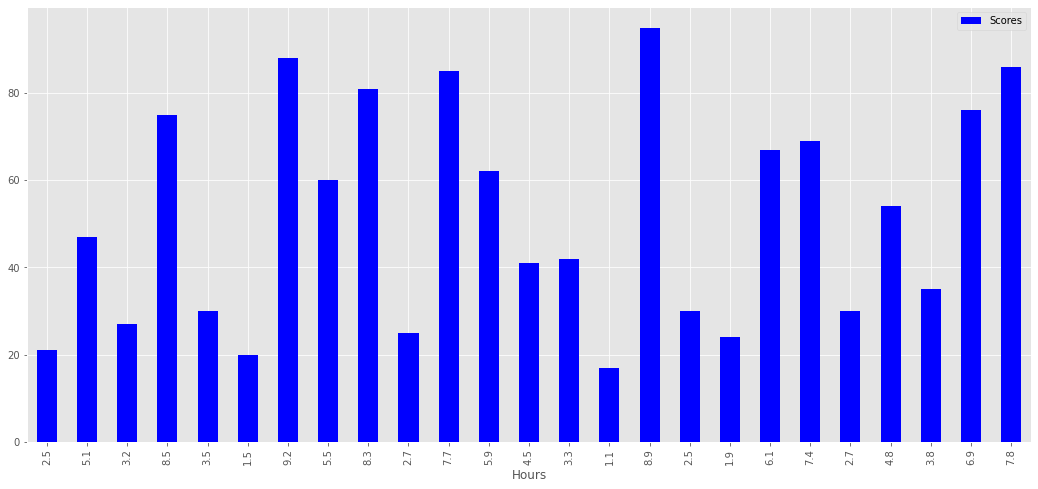

In [8]:
df.plot(x="Hours", y="Scores", kind="bar",figsize=(18,8), color = 'b') #plotting relation between Scores vs Hours

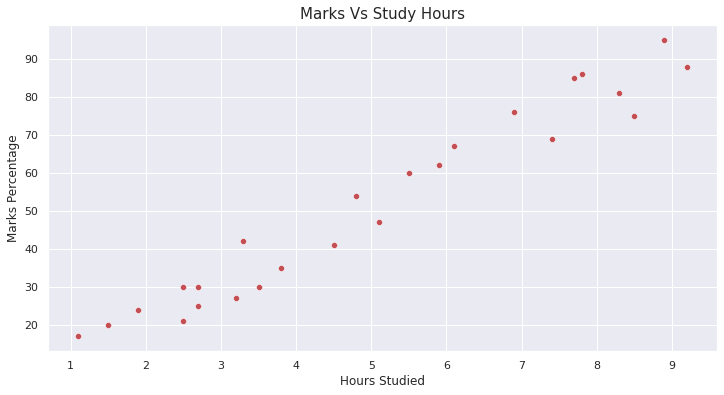

<Figure size 1200x1200 with 0 Axes>

In [9]:
#plotting scrore distribution
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(y= df['Scores'], x= df['Hours'], color = 'r')
plt.title('Marks Vs Study Hours',size = 15)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.figure(figsize=(15, 15), dpi=80)
plt.show()

From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

(0.0, 101.88736853393364)

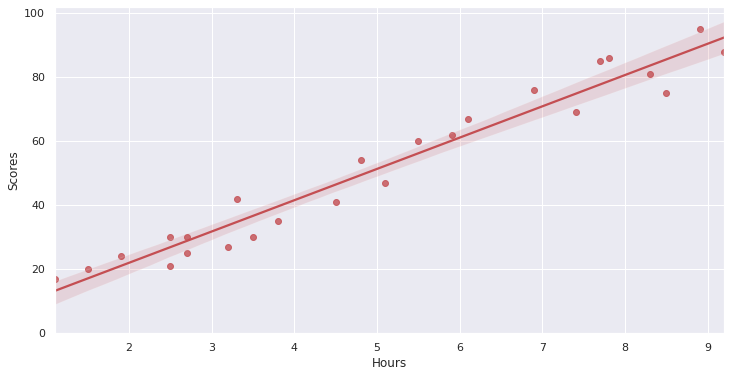

In [10]:
sns.set(rc={'figure.figsize':(12,6)})
sns.regplot(x='Hours',y='Scores',data=df,color='r')  #regression plot
plt.ylim(0,)

In [11]:
from scipy import stats

In [12]:
#finding Pearson co-efficient and P_value
pearson_coef,p_value = stats.pearsonr(df['Hours'],df['Scores']) 
print(pearson_coef,"\n", p_value) 

0.9761906560220884 
 9.132624467460325e-17


Here Pearson Co-efficient is approximately 0.976 wich suggest there is a strong co-relationship between Scores and Hours.

p-value is less than 0.001 , means relationship between Hours and Scores is significant.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# **Preparing Data**

We are going to divide the data into "attributes" (inputs) and "labels" (outputs).

In [14]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

#Spliting the Data in training and test set
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## **Training**

In [17]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Prediction**

In [18]:
pred_y = regression.predict(val_X)
df = pd.DataFrame({'Actual': [i for i in val_y], 'Predicted': [k for k in pred_y]})  #Actual score vs predicting score 
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [19]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Score': [k for k in pred_y]})  #Predicting Score based on hours-of-study
prediction

,Hours,Predicted Score
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [20]:
regression.intercept_  

1.9322042531516601

In [21]:
regression.coef_

array([9.94167834])

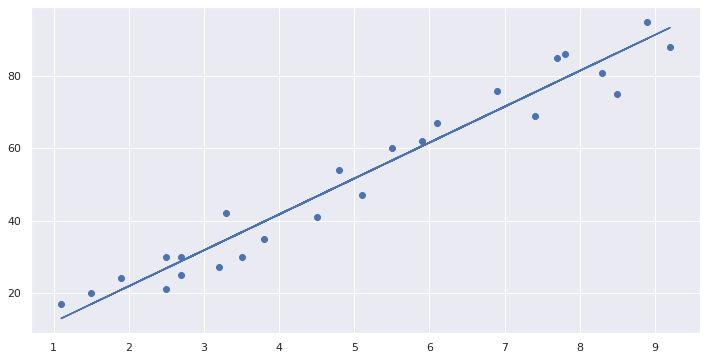

In [22]:
#Plotting Regression line
line = regression.coef_*X + regression.intercept_
sns.set(rc={'figure.figsize':(12,6)})
#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# **Comparison between actual score and predicted score**

In [23]:
compare_scores = pd.DataFrame({'Actual Score': val_y, 'Predicted Score': pred_y})
compare_scores

,Actual Score,Predicted Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# **Calculating R-Square**

In [24]:
regression.score(X,y)
print('The R-Square is: ', regression.score(X,y))  #deriving R-Squared value

The R-Square is:  0.9525462098246908


It also means that our model has approximately 95.2% accuracy.

# **Bar chart for comparing predicted score with actual score**

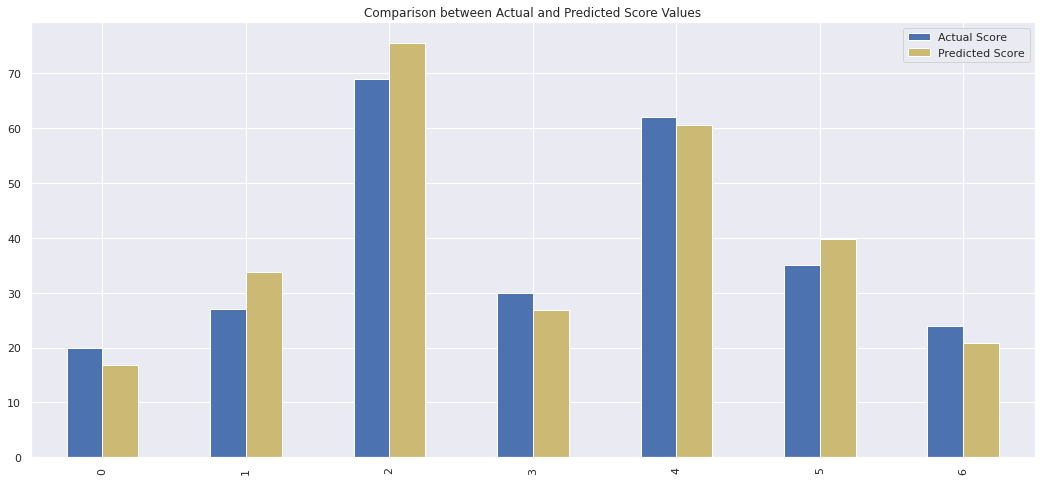

In [25]:
compare_scores.plot(kind='bar', figsize=(18,8), color=['b', 'y'], title= "Comparison between Actual and Predicted Score Values")

# **Plotting regression line for test data**

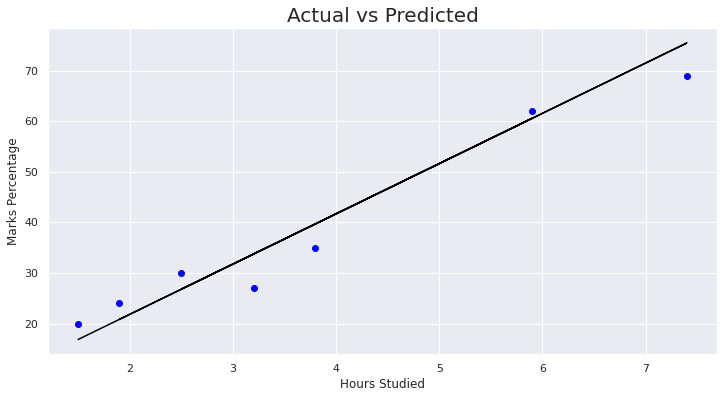

In [26]:
sns.set(rc={'figure.figsize':(12,6)})
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# **Calculating mean absolute error (Model Evaluation)**

In [27]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


This means our model has less amount of difference while predicting percentage. It also means our model is pretty good at predicting score from test data.

# *What will be predicted score if a student studies for 9.25 hrs/ day?*

In [28]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(answer[0]))

Score = 93.89272889341652


As we can see using our regression model, if a student studies for 9.25 hours a day he/she is likely to score approximately 93.892 marks.